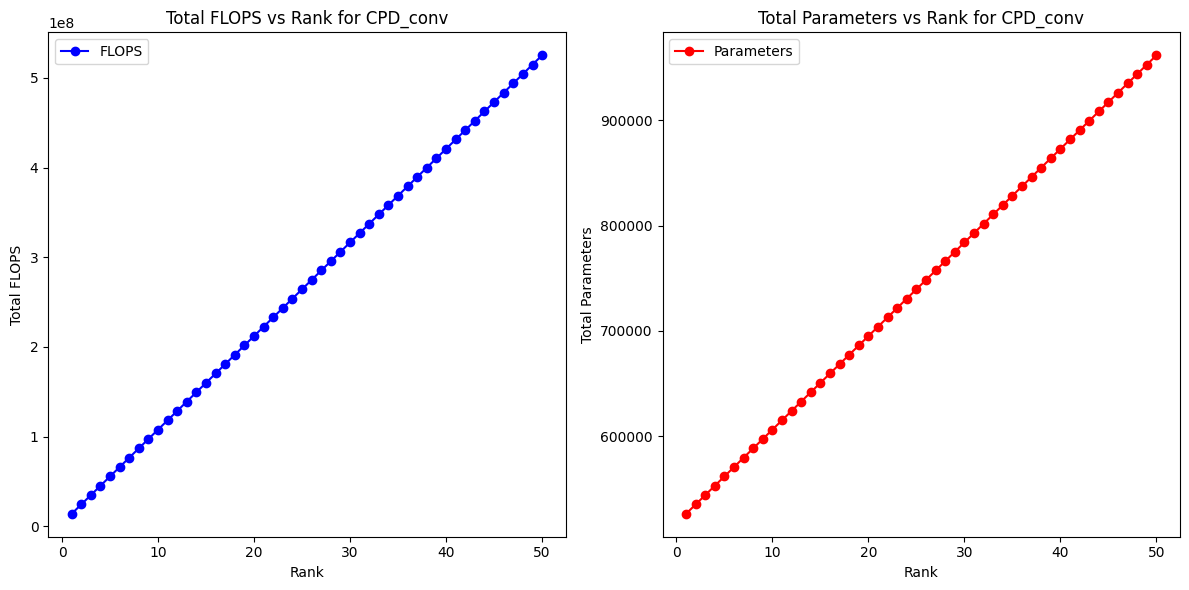

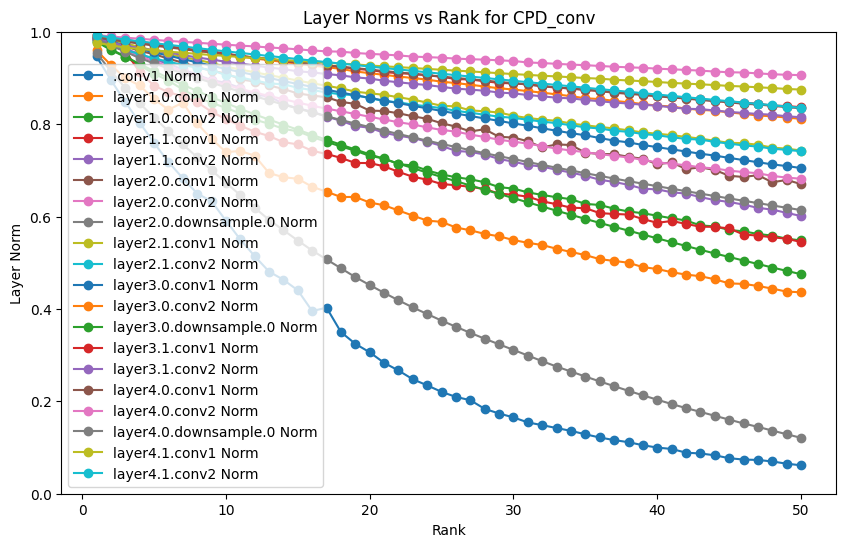

In [1]:
import os
import json
import matplotlib.pyplot as plt

# Define the convolution function name and the directory path
conv_func_name = "CPD_conv"
base_dir = f"./{conv_func_name}/"

# Initialize lists to hold ranks, FLOPS, parameters, and norms data
ranks = []
flops = []
params = []
layer_norms = {}

# Iterate over the rank directories and load data
for rank_dir in sorted(os.listdir(base_dir), key=lambda x: int(x)):
    if rank_dir == '0':
        continue
    rank_path = os.path.join(base_dir, rank_dir)
    if os.path.isdir(rank_path):
        rank = int(rank_dir)
        ranks.append(rank)

        # Load FLOPS and parameter data
        with open(os.path.join(rank_path, "flops_params.json"), "r") as f:
            stats = json.load(f)
            flops.append(stats["total_flops"])
            params.append(stats["total_params"])

        # Load layer norms
        norms_file = os.path.join(rank_path, "layer_norms.txt")
        with open(norms_file, "r") as f:
            for line in f:
                layer_name, norm_value = line.strip().split(": ")
                norm_value = float(norm_value)
                if layer_name not in layer_norms:
                    layer_norms[layer_name] = []
                layer_norms[layer_name].append(norm_value)

# Plot FLOPS and parameters as a function of rank
plt.figure(figsize=(12, 6))

# Plot FLOPS
plt.subplot(1, 2, 1)
plt.plot(ranks, flops, marker='o', color='blue', label="FLOPS")
plt.xlabel("Rank")
plt.ylabel("Total FLOPS")
plt.title(f"Total FLOPS vs Rank for {conv_func_name}")
plt.legend()

# Plot Parameters
plt.subplot(1, 2, 2)
plt.plot(ranks, params, marker='o', color='red', label="Parameters")
plt.xlabel("Rank")
plt.ylabel("Total Parameters")
plt.title(f"Total Parameters vs Rank for {conv_func_name}")
plt.legend()

plt.tight_layout()
plt.show()

# Plot norms for each layer
plt.figure(figsize=(10, 6))
for layer_name, norms in layer_norms.items():
    plt.plot(ranks, norms, marker='o', label=f"{layer_name} Norm")
plt.xlabel("Rank")
plt.ylabel("Layer Norm")
plt.title(f"Layer Norms vs Rank for {conv_func_name}")
plt.ylim((0,1))
plt.legend()
plt.show()


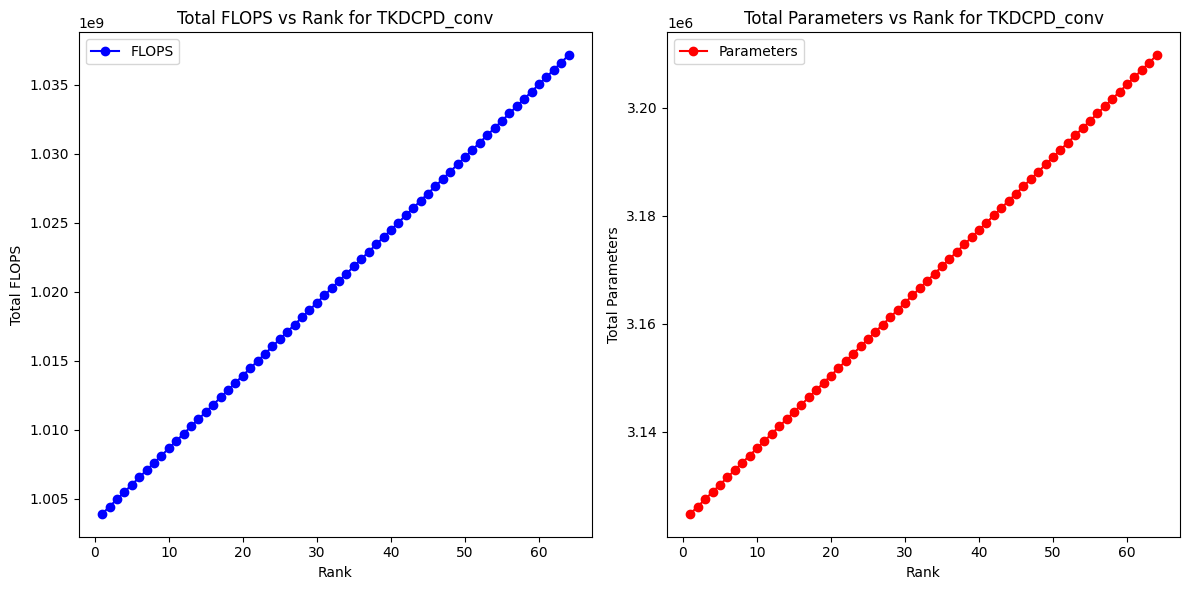

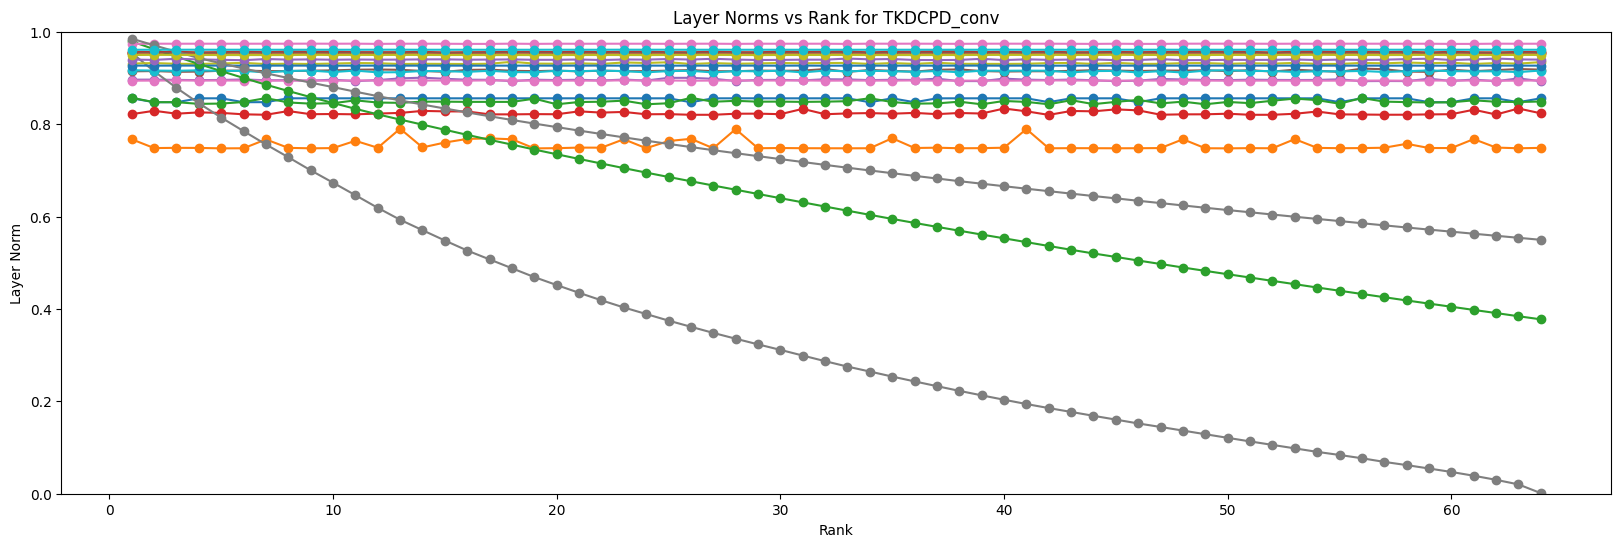

In [2]:
# Define the convolution function name and the directory path
conv_func_name = "TKDCPD_conv"
base_dir = f"./{conv_func_name}/"

# Initialize lists to hold ranks, FLOPS, parameters, and norms data
ranks = []
flops = []
params = []
layer_norms = {}

# Iterate over the rank directories and load data
for rank_dir in sorted(os.listdir(base_dir), key=lambda x: int(x)):
    if rank_dir == '0':
        continue
    rank_path = os.path.join(base_dir, rank_dir)
    if os.path.isdir(rank_path):
        rank = int(rank_dir)
        ranks.append(rank)

        # Load FLOPS and parameter data
        with open(os.path.join(rank_path, "flops_params.json"), "r") as f:
            stats = json.load(f)
            flops.append(stats["total_flops"])
            params.append(stats["total_params"])

        # Load layer norms
        norms_file = os.path.join(rank_path, "layer_norms.txt")
        with open(norms_file, "r") as f:
            for line in f:
                layer_name, norm_value = line.strip().split(": ")
                norm_value = float(norm_value)
                if layer_name not in layer_norms:
                    layer_norms[layer_name] = []
                layer_norms[layer_name].append(norm_value)

# Plot FLOPS and parameters as a function of rank
plt.figure(figsize=(12, 6))

# Plot FLOPS
plt.subplot(1, 2, 1)
plt.plot(ranks, flops, marker='o', color='blue', label="FLOPS")
plt.xlabel("Rank")
plt.ylabel("Total FLOPS")
plt.title(f"Total FLOPS vs Rank for {conv_func_name}")
plt.legend()

# Plot Parameters
plt.subplot(1, 2, 2)
plt.plot(ranks, params, marker='o', color='red', label="Parameters")
plt.xlabel("Rank")
plt.ylabel("Total Parameters")
plt.title(f"Total Parameters vs Rank for {conv_func_name}")
plt.legend()

plt.tight_layout()
plt.show()

# Plot norms for each layer
plt.figure(figsize=(20, 6))
for layer_name, norms in layer_norms.items():
    plt.plot(ranks, norms, marker='o', label=f"{layer_name} Norm")
plt.xlabel("Rank")
plt.ylabel("Layer Norm")
plt.ylim((0,1))
plt.title(f"Layer Norms vs Rank for {conv_func_name}")
# plt.legend()
plt.show()